In [ ]:
# Apredendo com um conjunto diferente de features.

Uma primeira abordagem utilizando preditores lineares.

In [30]:
% matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

In [31]:
db = pd.read_csv("opec/data_05_11_16.csv", index_col=0, parse_dates=True)

db_q = db.resample("Q").mean()

In [32]:
%ls eia

Markets_interest.csv     OECD_consumption.csv     table3c_M_199701-201712.csv
nonOECD_consumption.csv  opec_spare_capacity.csv  table4a_M_201101-201712.csv
nonOPEC_production.csv   saudi_production.csv


In [33]:
features = pd.read_csv("oil_features.csv", index_col=0, parse_dates=True)
features.head()

,y-o-y % OECD Consumption Change,non-OECD Consumption Growth,Saudi Production Change,Spare Capacity
2001-03-31,1.57,2.33,0.58,1.62
2001-06-30,0.32,4.67,-0.18,2.71
2001-09-30,-0.57,0.90,-0.68,2.56
2001-12-31,-0.80,2.91,-1.19,3.43
2002-03-31,-1.51,1.39,-1.17,4.41


In [34]:

X = np.array(features["2003-01":"2016-06"])
y = np.array(db_q["2003-01":"2016-06"])

print(X.shape)
print(y.shape)
print(np.any(np.isnan(X)))
print(np.any(np.isnan(y)))

(54, 4)
(54, 1)
False
False


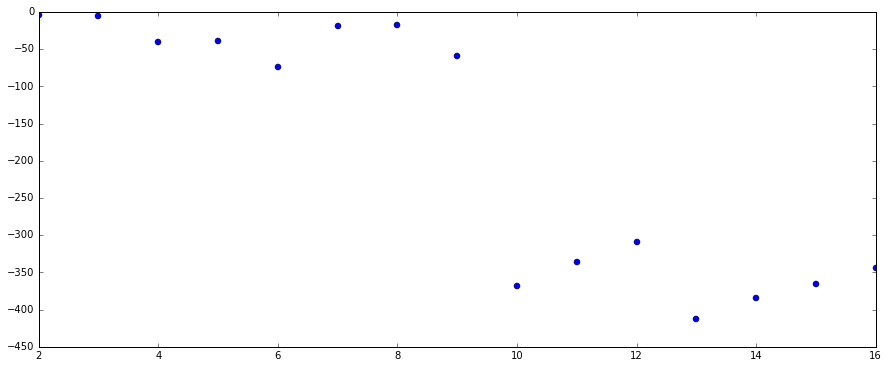

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

scores = list()
for split  in list(range(2,17)):
    tscv = TimeSeriesSplit(n_splits=split)
    lr = LinearRegression()
    score = cross_val_score(lr, X, y, cv=tscv, scoring="r2", n_jobs=4)
    scores.append(score.mean())

plt.plot(list(range(2,17)), scores, "o")    

In [36]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression


tscv = TimeSeriesSplit(n_splits=10)
train_score = list()
test_score = list()
for train_index, test_index in tscv.split(X):
        linear_regression = LinearRegression().fit(X[train_index,:], y[train_index])

In [37]:
y_pred = linear_regression.predict(X)
linear_regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

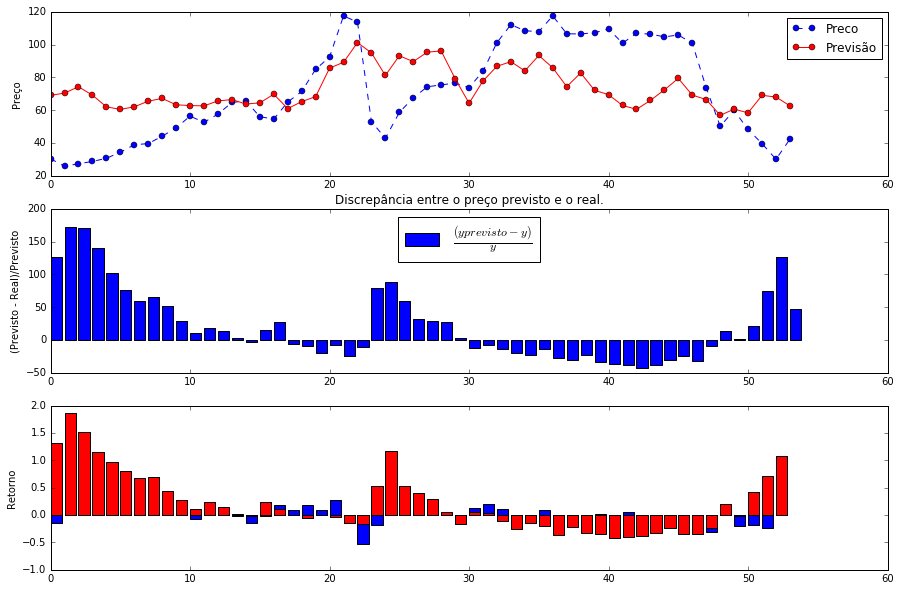

In [38]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3,1,1)

ax1.plot(y, color="b", marker="o", linestyle="--", label="Preco")
ax1.plot(y_pred, color = "r", marker="o", linestyle="-", label="Previsão")
ax1.set_ylabel("Preço")

ax1.legend(loc=1)


ax2 = fig.add_subplot(3,1,2)
perc = ((y_pred-y)/y)*100
ax2.bar(range(len(perc)),perc, align= "edge", label=r"$\frac{(yprevisto-y)}{y}$")
ax2.set_ylabel("(Previsto - Real)/Previsto")
ax2.set_title("Discrepância entre o preço previsto e o real.")
ax2.legend(loc=0, fontsize="xx-large")

###Estamos trabalhando em cima de retornos

ax3 = fig.add_subplot(3,1,3)

r_real=list()
r_pred = list()
for i in range(len(y[:])-1): 
    r_real.append((y[i+1][0]-y[i][0])/y[i])
    r_pred.append((y_pred[i+1][0]-y[i][0])/y[i])

ax3.bar(range(len(r_real)), r_real, color="b")
ax3.bar(range(len(r_pred)), r_pred, color="r")

ax3.set_ylabel("Retorno")
ax3.set_title("Retono")
#fig.legend((price_line, prev_line),("Preço OPEC", "Preço previsto"), loc=1)

In [39]:
r_pred = np.array(r_pred)
